<center><img src="images/header.png"></center>

<h1><center>Алгоритмы интеллектуальной обработки больших объемов данных</center></h1>
<hr>
<h2><center>SVM, Kernel Trick (практика)</center></h2>

### Адаменко Павел

**Срок сдачи:** 24 апреля 2017, 06:00 <br> 
**Штраф за опоздание:** -2 балла после 06:00 24 апреля, -4 балла после 06:00 1 мая, -6 баллов после 06:00 8 мая

При отправлении ДЗ указывайте фамилию в названии файла<br>

Не забудте создать задание в Slack через /todo.

Используйте данный Ipython Notebook при оформлении домашнего задания.

In [390]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score


%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 6)

# Семинарская часть

Функция `select_model` принимает на вход обучающую выборку и возвращает модель (машину опорных векторов) с наилучшими параметрами для данной выборки. Эту функцию нужно реализовать.

Подбираемые параметры подели включают в себя:
- различные функции ядра (линейное, RBF, полиномиальные разных степеней)
- различные значения константы $C$ ($0, 0.1, 1, 10, 100, 1000, 10000$)

Подбирать параметры необходимо с помощью 10-fold кросс-валидации. Сейчас в качестве заглушки функция всегда возвращает линейный SVC.

In [391]:
def select_model(x, y):
    """
    Implement some model selection strategy here:
    seek through different kernels and parameters.

    Use a validation scheme to select the best model
    
    Quality metric: accuracy

    Returns:
        SVM classifier implemented by sklearn SVC class.
    """
    best_accuracy = 0
    best_model = None
    
    kernel = 'linear'

    model = SVC(kernel=kernel)
    print("Trying model {}".format(model))
    
    accuracy = np.mean(cross_val_score(model, x, y))

    best_model = model
    best_accuracy = accuracy
    
    best_model.fit(x, y)
    print("Best model %s, with accuracy %f" % (best_model, best_accuracy))
    return best_model

Далее две вспомогательные функции, которые отображают данные и разделяющую поверхность

In [392]:
def plot_data_set(x, y, description=''):
    print("Plotting data set points")
    plt.figure(figsize=(8, 8))

    colors = np.array(['r', 'b'])[y]
    plt.title(description, fontsize='small')
    plt.scatter(x[:, 0], x[:, 1], marker='o', c=colors, s=50)
    
def plot_decision_region(x1_min, x2_min, x1_max, x2_max, clf, n_points=1000):
    print("Plotting decision region")
    x1, x2 = np.meshgrid(np.linspace(x1_min, x1_max, n_points), np.linspace(x2_min, x2_max, n_points))
    z = clf.decision_function(np.c_[x1.ravel(), x2.ravel()]).reshape(x1.shape)

    plt.contour(x1, x2, z, levels=[0.0], linestyles='solid', linewidths=2.0)
    plt.contour(x1, x2, z, levels=[-1.0, 1.0], linestyles='dashed', linewidths=1.0)

Generating 'Linearly-separated' data set
Trying model SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Best model SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False), with accuracy 0.898897
Plotting data set points
Plotting decision region


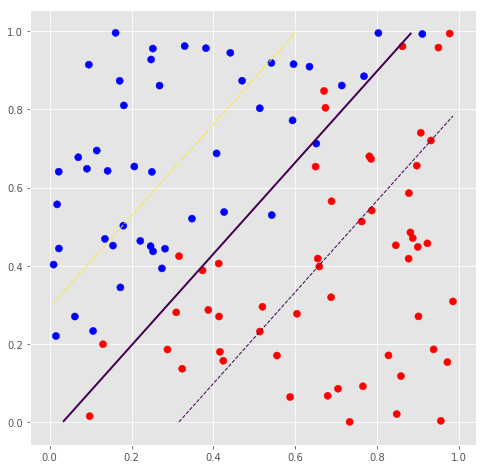

In [393]:
def generate_linear(size=100, k=1.1, b=0.0, nl=0.1):
    print("Generating 'Linearly-separated' data set")

    x = np.random.random((size, 2))
    y = np.zeros(size, dtype=int)
    noise = np.random.randn(size) * nl
    y[x[:, 1] - (k * x[:, 0] + b) > noise] = 1

    return x, y

x, y = generate_linear()
clf = select_model(x, y)
plot_data_set(x, y)
plot_decision_region(x[:, 0].min(), x[:, 1].min(), x[:, 0].max(), x[:, 1].max(), clf)

Generating 'Concentric circles' data set
Trying model SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Best model SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False), with accuracy 0.560049
Plotting data set points
Plotting decision region


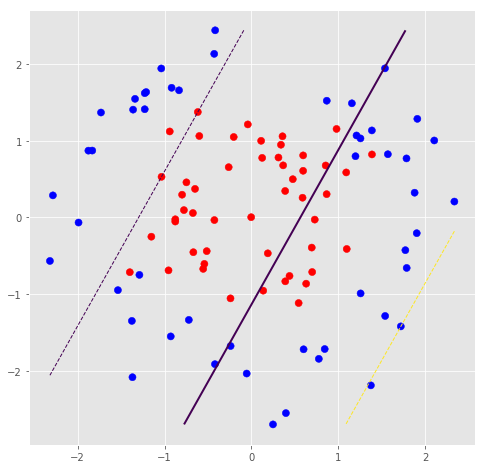

In [394]:
def generate_concentric(size=100, r1=1.0, r2=2.0, sigma=0.3):
    print("Generating 'Concentric circles' data set")
    x = np.zeros((size, 2))
    x[:int(size/2), 0] = sigma * np.random.randn(int(size/2)) + r1
    x[int(size/2):, 0] = sigma * np.random.randn(int(size/2)) + r2
    x[:, 1] = (np.random.random(size) - 0.5) * 2 * np.pi
    y = np.hstack([np.zeros(int(size/2), dtype=int), np.ones(int(size/2), dtype=int)])

    z = np.zeros((size, 2))
    z[:, 0] = x[:, 0] * np.cos(x[:, 1])
    z[:, 1] = x[:, 0] * np.sin(x[:, 1])

    return z, y

x, y = generate_concentric()
clf = select_model(x, y)
plot_data_set(x, y)
plot_decision_region(x[:, 0].min(), x[:, 1].min(), x[:, 0].max(), x[:, 1].max(), clf)

Generating 'Sinus-separated' data set
Trying model SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Best model SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False), with accuracy 0.700060
Plotting data set points
Plotting decision region


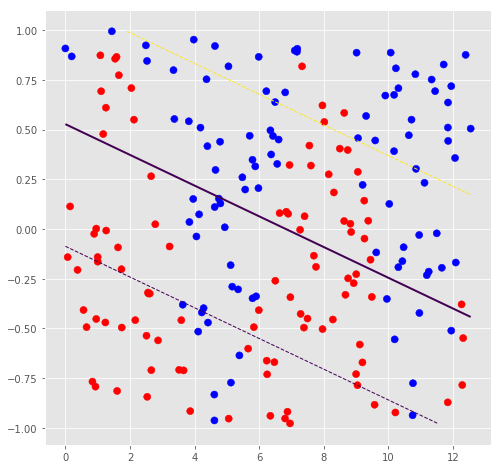

In [395]:
def generate_sin(size=200):
    print("Generating 'Sinus-separated' data set")

    x = np.random.random((size, 2))
    x[:, 0] = x[:, 0] * 4 * np.pi
    x[:, 1] = (x[:, 1] - 0.5) * 2
    y = np.zeros(size, dtype=int)
    y[x[:, 1] > np.sin(x[:, 0])] = 1

    return x, y

x, y = generate_sin()
clf = select_model(x, y)
plot_data_set(x, y)
plot_decision_region(x[:, 0].min(), x[:, 1].min(), x[:, 0].max(), x[:, 1].max(), clf)

# Регрессия с SVM (3 балла)

Загрузите набор данных из *titanium.csv*<br/>
Мы будем решать задачу восстановления столбца 'y' по столбцу 'x'.

In [396]:
!unzip data.zip

Archive:  data.zip
replace titanium.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [397]:
!ls

.DS_Store                        lecture_09-svm-pract.ipynb
.ipynb_checkpoints               lecture_09-svm.ipynb
__MACOSX                         titanium.csv
data.zip                         war_and_peace_en.txt
images                           war_and_peace_es.txt
lecture_09-svm-pract-Copy1.ipynb


In [398]:
df.head()

,word,label
0,war,1
1,and,1
2,peace,1
3,leo,1
4,tolstoy,1


## Визуализация данных (1 балл)

Выполните стандартную предобработку данных (z-score) и выведите их на графике.

In [399]:
df = pd.read_csv('titanium.csv')
# df

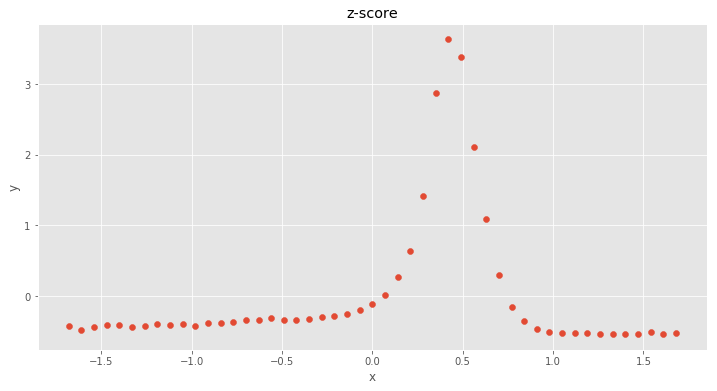

In [400]:
# Your Code Here
X = df.copy()
for x in ['x','y']:
    X[x] = (X[x]-X[x].mean())/X[x].std()
plt.scatter(X['x'], X['y'])
plt.title('z-score')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Обучение моделей (2 балла)

Рассмотрите 3 ядра: 
* Линейное
* Полиномиальное (degree = 3, gamma = 6, coef0 = 1)
* RBF (gamma = 6, coef0 = 1)

Во всех случаях установить ширину трубки `epsilon=0.01`

Для каждого из ядер:
1. Пусть `C = np.logspace(-2, 2, 10)`. Постройте графики зависимости ошибки от параметра $C$ (ось графика со значениями параметра $C$ должна быть в логарифмической шкале). Ошибка измеряется как средняя абсолютная ошибка. 
2. Для наулучшего параметра $С$ каждого из ядер постройте график с данными и предстазанием по svm

В каких случаях возникает эффекты недообучения, переобучения?

In [401]:
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVR

In [402]:
params_lst = [{'kernel':'linear'}, 
              {'kernel':'poly','degree' : 3, 'gamma' : 6, 'coef0' : 1}, 
              {'kernel':'rbf', 'gamma' : 6,  'coef0' : 1}
             ]
x = X['x'].get_values().reshape(-1, 1)
y = X['y']
C_lst = np.logspace(-2, 2, 10)
res = {'linear':[], 'poly':[], 'rbf':[]}
for params in params_lst:
    MAE_lst = []
    for C in C_lst:
        model = SVR(epsilon=0.01, C = C, **params)
        model.fit(x, y)
        predict = model.predict(x)
        MAE = mean_absolute_error(y, predict)
        MAE_lst.append(MAE)
    res[params['kernel']] = MAE_lst

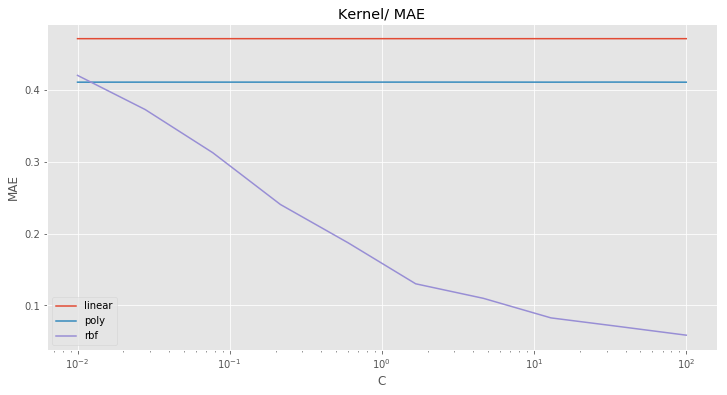

In [403]:
for key, MAE_lst in res.items():
    plt.plot(C_lst, MAE_lst, label = key)
    plt.legend()
    plt.title("Kernel/ MAE")
    plt.xlabel('C')
    plt.ylabel('MAE')
    plt.xscale('log')

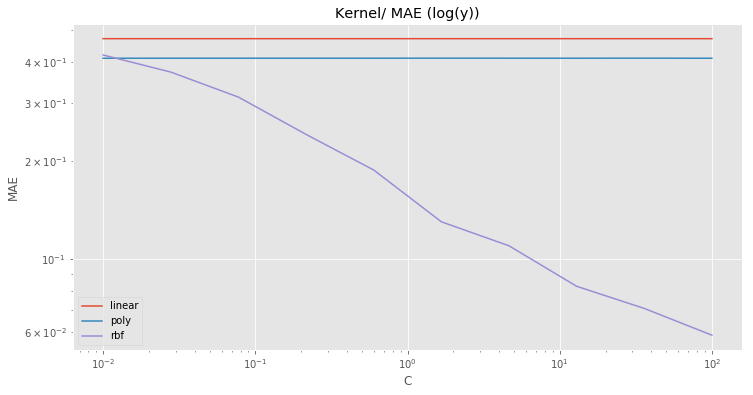

In [404]:
for key, MAE_lst in res.items():
    plt.plot(C_lst, MAE_lst, label = key)
    plt.legend()
    plt.title("Kernel/ MAE (log(y))")
    plt.xlabel('C')
    plt.ylabel('MAE')
    plt.xscale('log')
    plt.yscale('log')

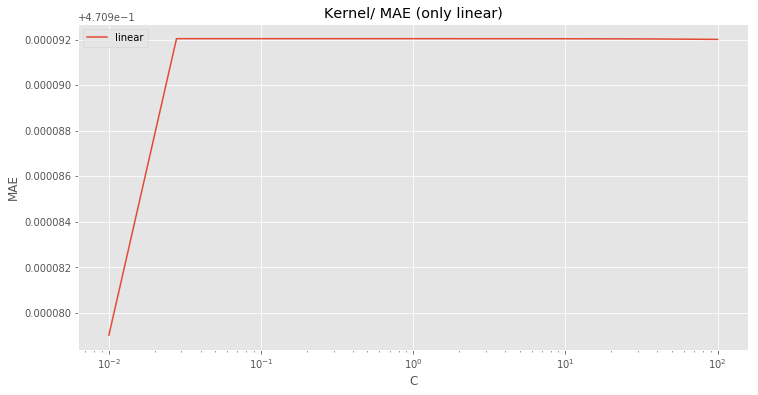

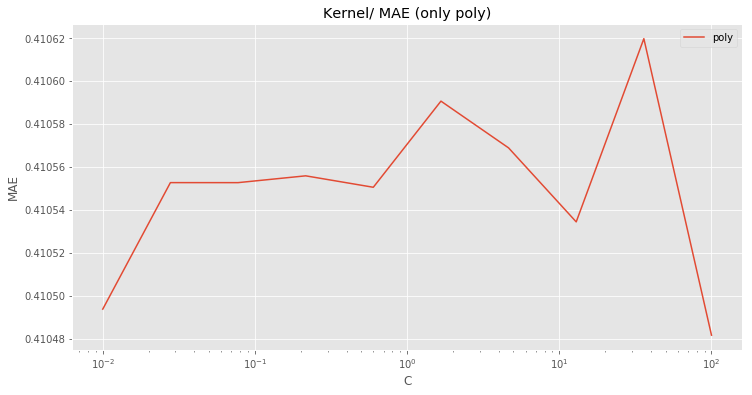

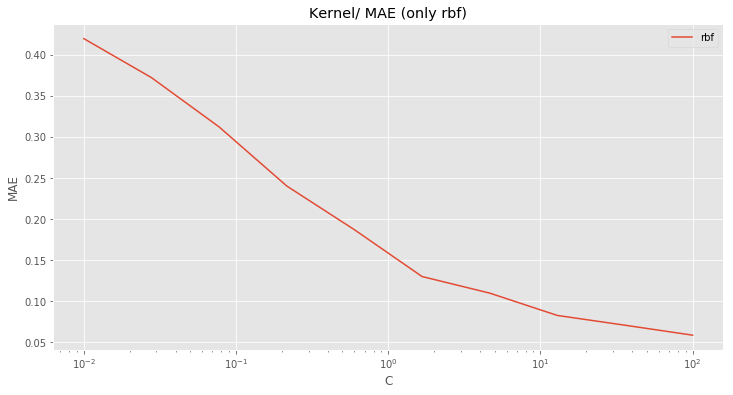

In [405]:
for key, MAE_lst in res.items():
    plt.plot(C_lst, MAE_lst, label = key)
    plt.legend()
    plt.title("Kernel/ MAE (only "+str(key)+')')
    plt.xlabel('C')
    plt.ylabel('MAE')
    plt.xscale('log')
#     plt.yscale('log')
    plt.show()

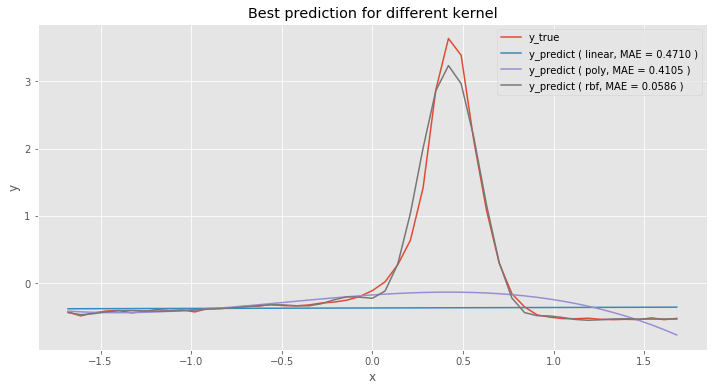

In [406]:
params_lst = [{'kernel':'linear'}, 
              {'kernel':'poly','degree' : 3, 'gamma' : 2, 'coef0' : 1}, 
              {'kernel':'rbf', 'gamma' : 6,  'coef0' : 1}
             ]
plt.title("Best prediction for different kernel")
plt.plot(X['x'], y, label = "y_true")
for param in params_lst:
    C = C_lst[np.argmin(res[param['kernel']])]
    model = SVR(epsilon=0.01, C = C, **param)
    model.fit(x, y)
    predict = model.predict(x)
    plt.plot(X['x'], predict, label = 'y_predict ( '+str(param['kernel'])+", MAE = %4.4f )"%\
            mean_absolute_error(y, predict))
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

    Заработала только модель с гаусовым ядром (rbf), что логично

# Определение языка слова (7 баллов)

В данном задании вам необходимо определить, на каком языке написано слово.

Вам будет дано два текста - первые предложения произведения "Война и Мир" на английком и испанском, разбитые на слова. У слов нет общепринятого числового представления, поэтому мы предлагаем вам реализовать собственноге ядро для SVM, основанное на редакторском расстоянии или [расстоянии Левинштейна](https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D1%81%D1%82%D0%BE%D1%8F%D0%BD%D0%B8%D0%B5_%D0%9B%D0%B5%D0%B2%D0%B5%D0%BD%D1%88%D1%82%D0%B5%D0%B9%D0%BD%D0%B0). 

Имплементировать расстояние Леванштейна не нужно - можно взять любую доступную реализацию, например [здесь](https://github.com/toastdriven/pylev) или [здесь](https://github.com/ztane/python-Levenshtein).

## Загрузка (1 балл)

Загрузите данные из файлов *war_and_peace_es.txt* и *war_and_peace_en.txt*.<br/> 
В результате вы должны получить pandas.DataFrame со столбцами *index* | *word* | *label*, где *index* - это индекс pandas, *word* - это слово и *label* - это метка класса (0 или 1)

In [407]:
## Your Code Here
df_en = pd.read_csv('war_and_peace_en.txt', header = None)
df_en['label'] = 1

df_es = pd.read_csv('war_and_peace_es.txt', header = None)
df_es['label'] = 0
df = pd.concat([df_en, df_es])
df = df.rename(columns={0:'word'})

del df_en, df_es

In [408]:
# like this
# 1 - en, 0- es
df[::2000]

,word,label
0,war,1
2000,and,1
4000,faces,1
956,altro,0
2956,era,0
4956,quil,0


## Подготовка данных (2 балла)

Особенностью пользовательского ядра в sklean.SVC является то, что на вход оно должно принимать именно вектора чисел.<br/>
В нашем случае это будут индексы соответствующих слов из корпуса. То есть вместо вектора ['treat', 'celebrit', 'prince', ...] на вход в ядро подается вектор из индексов [9209, 11145, 7735, ...] с помощью которых вы будете находить сами слова.

Прежде чем мы начнем строить ядро, надо подготовить данные. Для этого:
1. Задайте переменную RND_SEED, которая будет использоваться в любых генераторах случайных чисел в вашем коде (обычно параметр "random_seed")
2. Случайным образом перемешайте и заново проиндексируйте таблицу, полученную выше (используйте методы df.sample() и df.reset_index())
3. Ядро может вычисляться достаточно долго, поэтому можете урезать таблицу, но оставить в ней не менее 1000 слов.
4. Разбейте данные на обучающую и контрольную выборку в пропорции 60/40

В результате вы должны получить вектор-столбец X_train, X_test с **индексами** слов и векторы y_train, y_test с метками классов.

In [409]:
RND_SEED = 42
np.random.seed(RND_SEED)
df_new = df.sample(frac=1).reset_index(drop=True)

In [410]:
from sklearn.cross_validation import train_test_split

In [411]:
X_train, X_test, y_train, y_test = train_test_split(df_new['word'].index, df_new['label'], 
                                                    test_size=0.4, random_state=RND_SEED)

In [412]:
print("X_train shape\t"+str(X_train.shape))
print("X_test  shape\t"+str(X_test.shape))

X_train shape	(6841,)
X_test  shape	(4562,)


## Расчет ядра (3 балла)

Некоторые указания по составлению пользовательского ядра можно найти [здесь](http://stackoverflow.com/questions/26962159/how-to-use-a-custom-svm-kernel).

Если в двух словах:<br/>
Функция, реазлизующая расчет ядра должна принимать две матрицы $U$ и $V$ с признаковым описанием объектов (во време обучения они обе относятся к обучающей выборке, а во время применения - одна матрица относится к обучающей выборке, а другая к контрольной).

В результате, функция должна возвращать матрицу ядра $G_{ij} = K(U_i, V_j)$.

Таким образом, в этом задании вам надо:
1. Написать функцию *string_kernel(U, V)*, расчитывающее матрицу ядра $G_{ij}$
2. Визуализировать матрицу только для обучающей выборки (функция plt.imshow()).

**ВАЖНО**<br/>
На лекции мы рассмотрели, что ядро должно обладать определенными свойствами, поэтому не получится рассчитать $G_{ij}$ как расстояние Левинштейна между словами $\text{word}_i$ и $\text{word}_j$.<br/>
Вместо этого используйте какое-нибудь готовое ядро, зависящее от расстояние между объектами.

    Мое ядро: exp( - lev_dist(u, v) / max( len(u), len(v) ) )

In [413]:
def distance_lev(a, b):
    "Calculates the Levenshtein distance between a and b."
    n, m = len(a), len(b)
    if n > m:
        # Make sure n <= m, to use O(min(n,m)) space
        a, b = b, a
        n, m = m, n

    current_row = range(n+1) # Keep current and previous row, not entire matrix
    for i in range(1, m+1):
        previous_row, current_row = current_row, [i]+[0]*n
        for j in range(1,n+1):
            add, delete, change = previous_row[j]+1, current_row[j-1]+1, previous_row[j-1]
            if a[j-1] != b[i-1]:
                change += 1
            current_row[j] = min(add, delete, change)

    return current_row[n]

import math
def kernel_funct(a, b):
    t = distance_lev(a, b)
#     t = max(len(a), len(b))
    return np.exp(-distance_lev(a, b)/max(len(a), len(b)))

In [414]:
#Your Code Here
from tqdm import tqdm
def string_kernel(U, V):
    D = {i:k for i,k in zip(df_new.index, df_new['word'].get_values())}
#     U, V = U.get_values(), V.get_values()
    N = U.shape[0]
    G = np.zeros((N, N))
    for i, u in tqdm(enumerate(U)):
        for k, v in enumerate(V):
            a, b = D[int(u)], D[int(v)]
            t = kernel_funct(a, b)
            G[i, k] = t
#             G[k, i] = t
    return G


    Тест на выборке 100x100 - сверху - испанский язык, снизу - английский
    (в прямоугольных скобках - один язык)

100it [00:00, 126.38it/s]


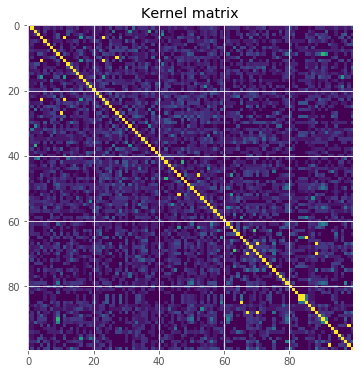

funzionavano   disse    genova   serata   corpo    meinen   tomorrow   her      pierre   been     
[1.00]    [0.40]    [0.51]    [0.43]    [0.43]    [0.47]     0.40      0.37      0.40      0.40     
[0.40]    [1.00]    [0.37]    [0.37]    [0.37]    [0.43]     0.37      0.37      0.51      0.37     
[0.51]    [0.37]    [1.00]    [0.51]    [0.37]    [0.43]     0.42      0.43      0.37      0.43     
[0.43]    [0.37]    [0.51]    [1.00]    [0.43]    [0.43]     0.42      0.51      0.43      0.43     
[0.43]    [0.37]    [0.37]    [0.43]    [1.00]    [0.37]     0.54      0.45      0.43      0.37     
[0.47]    [0.43]    [0.43]    [0.43]    [0.37]    [1.00]     0.42      0.43      0.43      0.61     
 0.40      0.37      0.42      0.42      0.54      0.42     [1.00]    [0.42]    [0.47]    [0.37]    
 0.37      0.37      0.43      0.51      0.45      0.43     [0.42]    [1.00]    [0.51]    [0.47]    
 0.40      0.51      0.37      0.43      0.43      0.43     [0.47]    [0.51]    [1.00]    [0.

In [438]:
tmp = np.array([i for i in sorted(X_new[['label', 'index']][:100].get_values(), key = lambda x:x[0])])
G = string_kernel(tmp[:,1], tmp[:,1])

plt.title("Kernel matrix")
plt.imshow(G)
plt.show()

s = ""
for c1 in tmp[:,1][::10]:
    w = df_new.iloc[c1, 0]
    s+= w+' '*(max(len('funzionavano')-len(w)-3,3))
print(s)
for c1, l in enumerate(G[::10,::10]):
    s = ""
    for c2, v in enumerate(l):
        s+=" %2.2f     "%v if tmp[c1*10, 0] != tmp[c2*10, 0] else "[%2.2f]    "%v
    print(s)

##### Отрисовка для всего X_train (работает порядка часа)

In [366]:
G = string_kernel(X_train, X_train)

6841it [59:04,  2.06it/s]


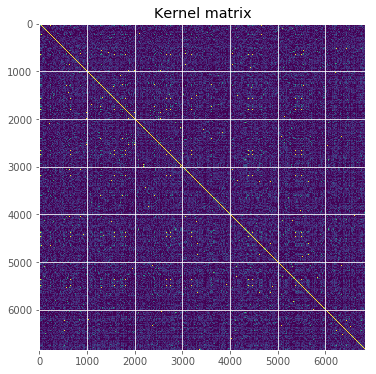

In [367]:
plt.title("Kernel matrix")
plt.imshow(G)
plt.show()

##### Результат на выборке размера 685 (доказательство работы)

In [370]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# we create an instance of SVM and fit out data.
clf = svm.SVC(kernel=string_kernel)
clf.fit(np.array([[i] for i in X_train[::10].ravel()]), y_train[::10])
predict = model.predict(np.array([[i] for i in X_test[:685].ravel()]))

t = accuracy_score(y_test[:685], predict)
print("accuracy score %2.4f"%t)

685it [00:34, 19.81it/s]

accuracy score 0.8117


In [363]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# we create an instance of SVM and fit out data.
clf = svm.SVC(kernel=string_kernel)
clf.fit(np.array([[i] for i in X_train[::10].ravel()]), y_train[::10])


accuracy_score(y_train[:685], predict)
print("accuracy score %2.4f"%accuracy_score(predict, y_test[:685]))

0.81167883211678837

## Оценка качества (1 балл)

Обучите метод опорных векторов с различными значениями параметра штрафа $C$.<br/>
Для каждого значения выведите accuracy на обучащюей и контрольной выборке.

Постарайтесь достичь качества в 70% на тестовой выборке

In [386]:
res_lst = {}
C_lst = np.logspace(-2, 2, 10)
for C in C_lst:
    model = svm.SVC(kernel=string_kernel, C = C)
    model.fit(np.array([[i] for i in X_train[:2000].ravel()]), y_train[:2000])
    predict = model.predict(np.array([[i] for i in X_test[:2000].ravel()]))
    t = accuracy_score(y_test[:2000], predict)
    print("accuracy score %2.4f"%t)
    res_lst[C] = t

2000it [55:36,  5.55it/s] 
2000it [05:15,  7.81it/s]
0it [00:00, ?it/s]

accuracy score 0.5635


2000it [05:13,  5.81it/s]
2000it [05:25,  7.04it/s]
0it [00:00, ?it/s]

accuracy score 0.6705


2000it [05:14,  5.66it/s]
2000it [05:13,  7.31it/s]
0it [00:00, ?it/s]

accuracy score 0.7845


2000it [05:03,  5.73it/s]
2000it [05:10,  7.45it/s]
0it [00:00, ?it/s]

accuracy score 0.8410


2000it [05:03,  5.78it/s]
2000it [05:12,  7.29it/s]
0it [00:00, ?it/s]

accuracy score 0.8045


2000it [05:02,  5.87it/s]
2000it [05:10,  7.44it/s]
0it [00:00, ?it/s]

accuracy score 0.7755


2000it [05:08,  5.51it/s]
2000it [05:17,  7.64it/s]
0it [00:00, ?it/s]

accuracy score 0.7665


2000it [05:21,  6.18it/s]
2000it [05:15,  7.83it/s]
0it [00:00, ?it/s]

accuracy score 0.7675


2000it [05:14,  5.59it/s]
2000it [05:35,  7.29it/s]
1it [00:00,  8.52it/s]

accuracy score 0.7640


2000it [05:21,  6.15it/s]
2000it [05:22,  7.10it/s]

accuracy score 0.7760


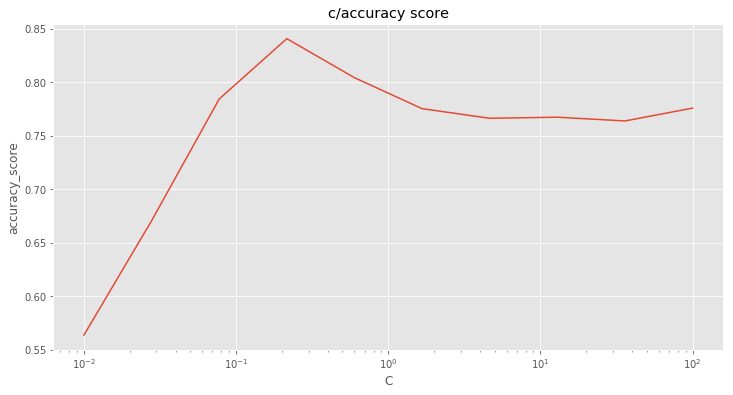

In [387]:
plt.title("c/accuracy score")
plt.plot(list(res_lst.keys()), list(res_lst.values()))
plt.xlabel('C')
plt.ylabel('accuracy_score')
plt.xscale('log')
plt.show()
